Import libraries

In [1]:
import os 
import collections
import numpy as np
from tqdm import tqdm
from utils import load_pickle
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

Settings

In [ ]:
data_folder = "/data/rbg/users/klingmin/projects/MS_processing/data/nist2023/frags_preds"
results_folder = "/data/rbg/users/klingmin/projects/ML_MS_analysis/FP_prediction/mist/ls_results/MIST_canopus_2025-04-23_13-31/"
split = load_pickle(os.path.join(results_folder, "best_split.pkl"))
data_ids = load_pickle(os.path.join(results_folder, "data_ids.pkl")) 

Get the train and test data

In [40]:
train_ids = [data_ids[i] for i in split["train_indices"]]
test_ids = [data_ids[i] for i in split["test_indices"]]

print(len(train_ids), len(test_ids))

train_data = [load_pickle(os.path.join(data_folder, f"{i}.pkl")) for i in train_ids]
test_data = [load_pickle(os.path.join(data_folder, f"{i}.pkl")) for i in test_ids]

16026 3470


Look at the overlap for molecules

In [33]:
ratio = len(test_ids) / (len(train_ids) + len(test_ids)) * 100
print(ratio)

train_mols = set([r["inchikey_original"][:14] for r in train_data])
test_mols = set([r["inchikey_original"][:14] for r in test_data])

len(train_mols.intersection(test_mols)) / len(test_ids) * 100

17.798522773902338


31.498559077809794

Look at the distribution of instrument

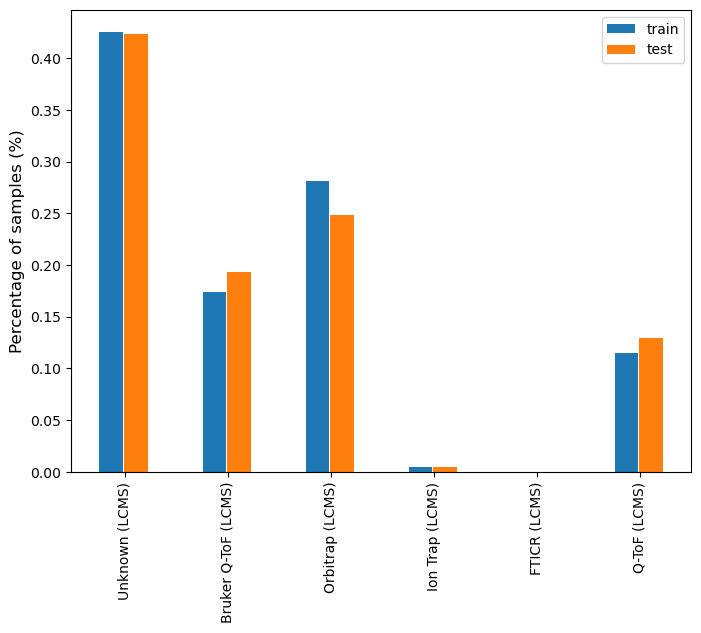

[0.4255584674903282, 0.17390490453013852, 0.2811681018345189, 0.004617496568076875, 6.239860227130913e-05, 0.11468863097466617]
[0.42363112391930835, 0.19337175792507205, 0.2484149855907781, 0.004899135446685879, 0.0, 0.12968299711815562]
Chi-squared: 22.962142315574606
p-value: 0.0003432379357437128
Expected frequencies:
[[6.81450246e+03 2.84252708e+03 4.41257530e+03 7.48033443e+01
  8.22014772e-01 1.88076980e+03]
 [1.47549754e+03 6.15472918e+02 9.55424703e+02 1.61966557e+01
  1.77985228e-01 4.07230201e+02]]


In [39]:
train_instruments = collections.Counter([r["instrument_type"] for r in train_data])
test_instruments = collections.Counter([r["instrument_type"] for r in test_data])

unique_instruments = set(list(train_instruments.keys()) + list(test_instruments.keys()))

train_instrument_counts = [train_instruments[i] if i in train_instruments else 0 for i in unique_instruments]
test_instrument_counts = [test_instruments[i] if i in test_instruments else 0 for i in unique_instruments]

plt.figure(figsize=(8, 6))
bar_width = 0.23

train_bars = np.arange(len(unique_instruments))
test_bars = [x + bar_width + 0.01 for x in train_bars]

plt.bar(train_bars, [x / len(train_data) for x in train_instrument_counts], width = bar_width, label ='train') 
plt.bar(test_bars, [x / len(test_data) for x in test_instrument_counts], width = bar_width, label ='test') 

plt.ylabel('Percentage of samples (%)', fontsize = 12)
unique_instruments = [str(u) for u in unique_instruments]
plt.xticks([r + bar_width - 0.1 for r in range(len(unique_instruments))], unique_instruments, rotation = 90)

plt.legend()
plt.show()

print([x / len(train_data) for x in train_instrument_counts])
print([x / len(test_data) for x in test_instrument_counts])
chi2, p, dof, expected = chi2_contingency(np.array([train_instrument_counts, test_instrument_counts]))

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Expected frequencies:\n{expected}")

Look at the distribution of adduct

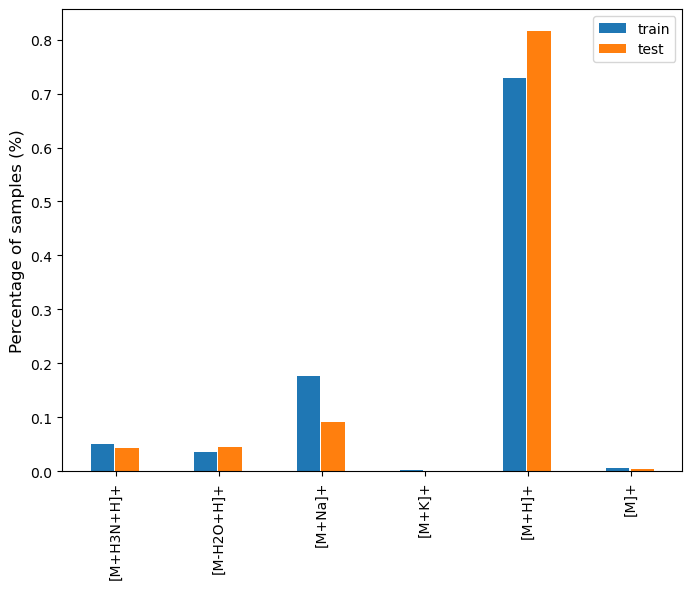

Chi-squared: 175.92373705699944
p-value: 3.970416131299257e-36
Expected frequencies:
[[7.76803960e+02 5.88562577e+02 2.59345661e+03 3.28805909e+01
  1.19438746e+04 9.04216249e+01]
 [1.68196040e+02 1.27437423e+02 5.61543394e+02 7.11940911e+00
  2.58612536e+03 1.95783751e+01]]


In [35]:
train_adducts = collections.Counter([r["precursor_type"] for r in train_data])
test_adducts = collections.Counter([r["precursor_type"] for r in test_data])
unique_adducts = set(list(train_adducts.keys()) + list(test_adducts.keys()))

train_adduct_counts = [train_adducts[i] if i in train_adducts else 0 for i in unique_adducts]
test_adduct_counts = [test_adducts[i] if i in test_adducts else 0 for i in unique_adducts]

plt.figure(figsize=(8, 6))
bar_width = 0.23

train_bars = np.arange(len(unique_adducts))
test_bars = [x + bar_width + 0.01 for x in train_bars]

plt.bar(train_bars, [x / len(train_data) for x in train_adduct_counts], width = bar_width, label ='train') 
plt.bar(test_bars, [x / len(test_data) for x in test_adduct_counts], width = bar_width, label ='test') 

plt.ylabel('Percentage of samples (%)', fontsize = 12)
plt.xticks([r + bar_width - 0.1 for r in range(len(unique_adducts))], unique_adducts, rotation = 90)

plt.legend()
plt.show()

chi2, p, dof, expected = chi2_contingency(np.array([train_adduct_counts, test_adduct_counts]))

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Expected frequencies:\n{expected}")



In [36]:
train_energies = collections.Counter([r["collision_energy"] for r in train_data])
test_energies = collections.Counter([r["collision_energy"] for r in test_data])

energy_bins = ["-", "0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-150", "150-"]
train_energies_binned = {"-": 0, "0-20": 0, "20-40": 0, "40-60": 0, "60-80": 0, "80-100": 0, "100-120":0, "120-150": 0, "150-": 0}
test_energies_binned = {"-": 0, "0-20": 0, "20-40": 0, "40-60": 0, "60-80": 0, "80-100": 0, "100-120":0, "120-150": 0, "150-": 0}

for e,c in train_energies.items():

    if e == "-": train_energies_binned["-"] += c 
    elif e < 20: train_energies_binned["0-20"] += c 
    elif e < 40: train_energies_binned["20-40"] += c 
    elif e < 60: train_energies_binned["40-60"] += c 
    elif e < 80: train_energies_binned["60-80"] += c 
    elif e < 100: train_energies_binned["80-100"] += c 
    elif e < 120: train_energies_binned["100-120"] += c 
    elif e < 150: train_energies_binned["120-150"] += c 
    else: train_energies_binned["150-"] += c 

for e,c in test_energies.items():

    if e == "-": test_energies_binned["-"] += c 
    elif e < 20: test_energies_binned["0-20"] += c 
    elif e < 40: test_energies_binned["20-40"] += c 
    elif e < 60: test_energies_binned["40-60"] += c 
    elif e < 80: test_energies_binned["60-80"] += c 
    elif e < 100: test_energies_binned["80-100"] += c 
    elif e < 120: test_energies_binned["100-120"] += c 
    elif e < 150: test_energies_binned["120-150"] += c 
    else: test_energies_binned["150-"] += c 

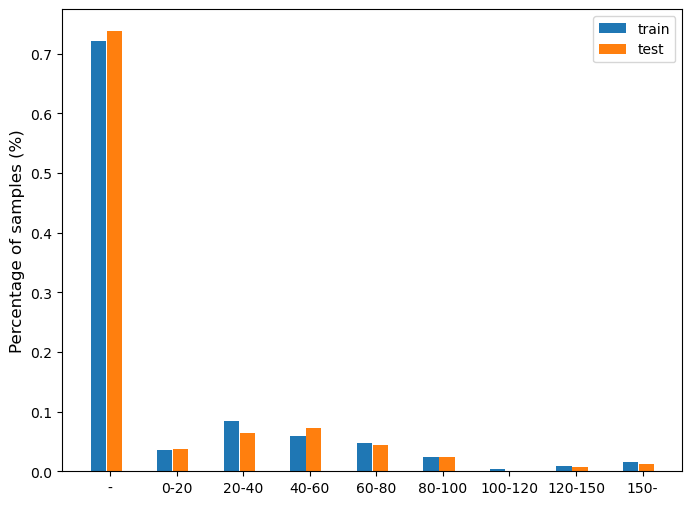

[11556, 584, 1348, 954, 761, 379, 51, 135, 258]
[2559, 127, 223, 253, 153, 84, 4, 22, 45]
Chi-squared: 28.77811602789668
p-value: 0.0001588040952722799
Expected frequencies:
[[ 590.62813603 1305.03066345 1002.65564022  759.26036053  384.61438394
    45.68853373  130.41999628  251.70228582]
 [ 120.37186397  265.96933655  204.34435978  154.73963947   78.38561606
     9.31146627   26.58000372   51.29771418]]


In [37]:

train_binned_energy_counts = [train_energies_binned[i] for i in test_energies_binned.keys()]
test_binned_energy_counts = [test_energies_binned[i] for i in test_energies_binned.keys()]

plt.figure(figsize=(8, 6))
bar_width = 0.23

train_bars = np.arange(9)
test_bars = [x + bar_width + 0.01 for x in train_bars]

plt.bar(train_bars, [x / len(train_data) for x in train_binned_energy_counts], width = bar_width, label ='train') 
plt.bar(test_bars, [x / len(test_data) for x in test_binned_energy_counts], width = bar_width, label ='test') 

plt.ylabel('Percentage of samples (%)', fontsize = 12)
plt.xticks([r + bar_width - 0.05 for r in range(len(energy_bins))], energy_bins)

plt.legend()
plt.show()

print(train_binned_energy_counts)
print(test_binned_energy_counts)

chi2, p, dof, expected = chi2_contingency(np.array([train_binned_energy_counts[1:], test_binned_energy_counts[1:]]))

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Expected frequencies:\n{expected}")


Analyze the out of vocab rate

In [38]:
train_formula = set()

for r in tqdm(train_data):

    formula = set([f["comment"]["f_pred"] for f in r["peaks"] if f["comment"]["f_pred"] != ""])
    train_formula.update(formula)

test_formula = set()

for r in tqdm(test_data):

    formula = set([f["comment"]["f_pred"] for f in r["peaks"] if f["comment"]["f_pred"] != ""])
    test_formula.update(formula)


  0%|          | 0/16026 [00:00<?, ?it/s]

100%|██████████| 3470/3470 [00:00<00:00, 7601.07it/s]


In [27]:
len(test_formula.intersection(train_formula)) / len(test_formula) * 100

87.12735579668761